# Jupyter Notebook
## Fundamentals of Data Analyses Project 2019

### Importing of Python Modules

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sbn

Below Histogram displays the distribution of customers based on the party size to determine the most common party size that frequented the restaurant during the data gathering period. Code adapted from [here](https://datatofish.com/use-pandas-to-calculate-stats-from-an-imported-csv-file/) to read in data using pandas and from [here](http://python-graph-gallery.com/histogram/) to generate seaborn plot. 

Size of plot adjusted using code from [here](https://www.mikulskibartosz.name/how-to-change-plot-size-in-jupyter-notebook/), styling of plot area code adapted from [here](https://seaborn.pydata.org/tutorial/aesthetics.html).

In [2]:
font = {'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)

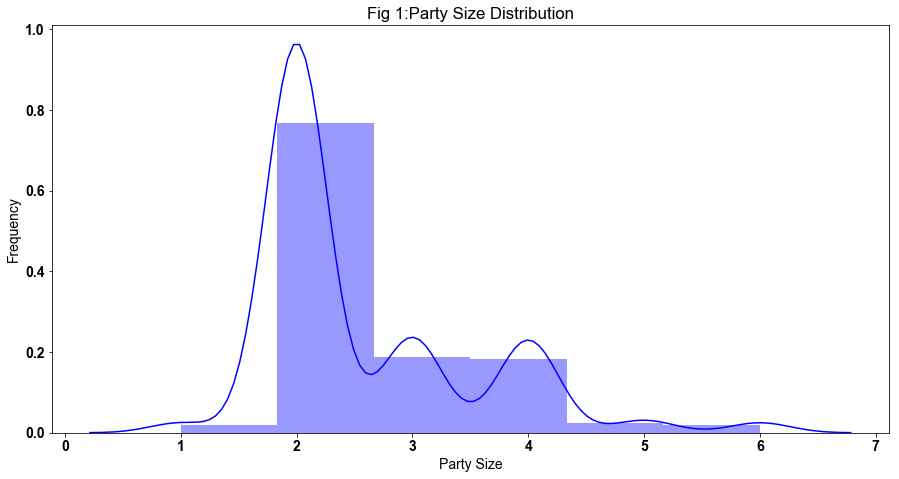

In [3]:
df = pd.read_csv (r'Resources/tips.csv')

plt.rcParams["figure.figsize"] = (15,7.5)

sbn.distplot(df["size"], color='blue',  bins=6)
sbn.set_style("darkgrid")
plt.title('Fig 1:Party Size Distribution')
plt.xlabel('Party Size')
plt.ylabel('Frequency')
plt.savefig('Resources/Party_Size_Distribution.png')
plt.show()

Fig 1 above shows that the majority of customers attending the restaurant came in a party of 2, this would introduce a bias into anyanalysis into a possible relationship between party size and tip amount as the data is not normally distributed in the shape of a bell curve.

 Percentage calculation adapted from [here](https://stackoverflow.com/questions/50558458/pandas-percentage-by-value-in-a-column).

In [4]:
df['size'].value_counts(normalize=True)*100

2    63.934426
3    15.573770
4    15.163934
5     2.049180
6     1.639344
1     1.639344
Name: size, dtype: float64

html code below aligns table to left, code adapted from [here](https://stackoverflow.com/questions/21892570/ipython-notebook-align-table-to-the-left-of-cell).

In [6]:
%%html
<style>
table {float:left}
</style>

Table 2 below further supports the histogram in Fig 1 in that an analysis of any relationship between party size and the amount of tip would be biased as the majority of the data points (64%) occured in a party size of 2.

**Table 2: % Occurence of Party Size**

|**Party Size**|**% of Total**|
|:-----:|:-----:|
|1|1.64%|
|2|63.93%|
|3|15.57%|
|4|15.16%|
|5|2.05%|
|6|1.64%|
|**Total**|**100%**|